# **READ ME**
  * Made By:
    * Ryan Teoh (CPSC 483-01)
    * Marco Botello (CPSC 483-01)
  * Description:
     * This notebook will be using the California Housing dataset and Pandas DataFrame feature to compare and contrast models. Throughout the notebook we use sklearn to view scatterplots and covariance matrices to narrow down what type of model we would like to use to predict MedHouseVal. To compare models we will make use of their MSE's as well as their R2 scores.

# 1.) Use read_csv() to load and examine each dataset.

In [1]:
import numpy as np
import pandas as pd

columnNames=['a','b','c']
print("Dataset1:")
set1 = pd.read_csv('dataset1.csv', names=columnNames)
print(set1,"\n")

print("Dataset2:")
set2 = pd.read_csv('dataset2.csv', names=columnNames)
print(set2,"\n")

print("Dataset3:")
set3 = pd.read_csv('dataset3.csv', names=columnNames)
print(set3)

Dataset1:
             a          b  c
0     1.800539  -0.539218  0
1    24.330831  26.439146  1
2    21.124114  21.166814  1
3    10.517197  11.175424  0
4    19.737721  23.341138  1
..         ...        ... ..
195   7.701944   5.303327  0
196  24.079743  24.066883  1
197  24.351346  20.908176  1
198  24.688063  24.996258  1
199  36.190529  18.514561  1

[200 rows x 3 columns] 

Dataset2:
             a          b  c
0    -1.664407  17.245415  0
1    20.211237   8.599145  1
2    12.675218  23.148375  1
3    17.552831  10.311698  1
4    14.959941  20.225844  1
..         ...        ... ..
195  14.648641  18.261043  1
196  15.618267  10.398619  1
197  18.280171   9.001519  1
198  13.415497   6.349741  1
199   5.702577  25.346361  0

[200 rows x 3 columns] 

Dataset3:
             a          b  c
0    30.876149   7.806793  0
1    34.060953  14.802478  0
2    30.860440  16.270849  0
3    21.738646  10.306756  1
4    17.664476  30.921761  1
..         ...        ... ..
195   8.029149  17.

# 2.) Use logistic regression to fit() and score() a binary classifier for dataset 1. How accurate are the model’s predictions?

In [2]:
from sklearn.linear_model import LogisticRegression

X = pd.read_csv('dataset1.csv', names=columnNames, usecols = ['a','b'])
# print(X)

y = pd.read_csv('dataset1.csv',names=columnNames, usecols = ['c'])
y = y.to_numpy().flatten()
# print(y)


model = LogisticRegression(solver='liblinear', random_state=0).fit(X,y)

# model.classes_
# model.intercept_
# model.coef_

print("Our model score: ",model.score(X,y))

Our model score:  1.0


# 3.) Repeat experiment (2) for dataset 2. How well does it score?

In [3]:
X2 = pd.read_csv('dataset2.csv', names=columnNames, usecols = ['a','b'])
# print(X)

y2 = pd.read_csv('dataset2.csv',names=columnNames, usecols = ['c'])
y2 = y2.to_numpy().flatten()
# print(y)


model = LogisticRegression(solver='liblinear', random_state=0).fit(X2,y2)

# model.classes_
# model.intercept_
# model.coef_

print("Our model score: ",model.score(X2,y2))

Our model score:  0.525


# 4.) Create separate scatterplots for datasets 1 and 2, plotting points from class 0 with a different color and marker from points in class 1. What accounts for the discrepancies between experiments (2) and (3)?


Dataset1 Scatter:


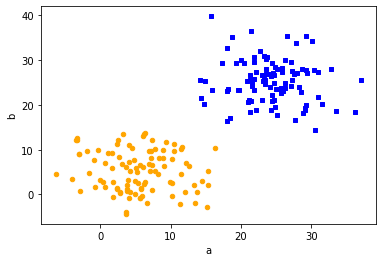


Dataset2 Scatter:


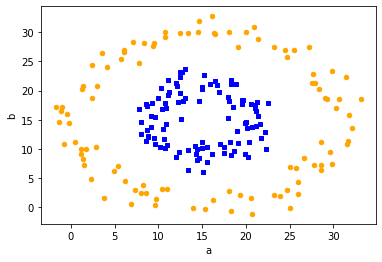

In [57]:
import matplotlib
import matplotlib.pyplot as plt
classes = model.classes_

#Need to change colors based on classes here

colors = {0:'orange', 1:'blue'}
shape = {0:'o', 1:'s'}

print("Dataset1 Scatter:")
fig, ax = plt.subplots()
grouped = set1.groupby('c')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter',x='a', y='b', color=colors[key], marker=shape[key])

plt.show()

print("\nDataset2 Scatter:")
fig, ax = plt.subplots()
grouped = set2.groupby('c')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter',x='a', y='b', color=colors[key], marker=shape[key])

plt.show()




# 5.) Fit and score Gaussian Naive Bayes classifiers for datasets 1 and 2. How well do these classifiers score compared to logistic regression?

In [5]:
from sklearn.naive_bayes import GaussianNB

gaussianModel = GaussianNB().fit(X,y)
print("Dataset 1 Score: ",gaussianModel.score(X,y))

gaussianModel = GaussianNB().fit(X2,y2)
print("\nDataset 2 Score: ",gaussianModel.score(X2,y2))

Dataset 1 Score:  1.0

Dataset 2 Score:  1.0


# 6.)Repeat experiment (5) with K-Nearest Neighbor classifiers.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kNModel = KNeighborsClassifier().fit(X,y)
print("Dataset 1 Score: ",kNModel.score(X,y))

kNModel = KNeighborsClassifier().fit(X2,y2)
print("\nDataset 2 Score: ",kNModel.score(X2,y2))

Dataset 1 Score:  1.0

Dataset 2 Score:  1.0


# 7) Use the code from KV Subbaiah Setty’s tutorial How To Plot A Decision Boundary For Machine Learning Algorithms in Python as a guide, plot the decision boundaries for each classifier and dataset. What differences do you observe?


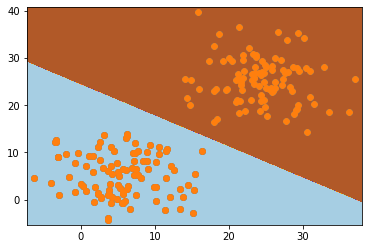

In [80]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Get min and max of the domain
min1, max1 = X['a'].min()-1, X['a'].max()+1
min2, max2 = X['b'].min()-1, X['b'].max()+1

# Define x and y scale
X1grid = np.arange(min1, max1, 0.1)
X2grid = np.arange(min2, max2, 0.1)

# Generate the grid's lines and rows
XX, YY = np.meshgrid(X1grid, X2grid)

# Flatten the grid
r1, r2 = XX.flatten(), YY.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# Horizontally stack the vectors inorder to create the x1 and x2 input
grid = np.hstack((r1,r2))

# Define the model
model = LogisticRegression()

# Fit the model
model.fit(X, y)

# Predict the grid
yHat = model.predict(grid)

# Reshape the predictions
ZZ = yHat.reshape(XX.shape)

# Plot XX, YY, and ZZ
plt.contourf(XX, YY, ZZ, cmap='Paired')

# Create scatter plot for each class
for class_value in range(2):
    
    # Get row indexes for the samples
    row_ix = np.where(y == class_value)
    # Create scatter for the samples
    plt.scatter(X['a'], X['b'], cmap='Paired')
    
    #HOW TF DO I SEPERATE THE COLORS/CLASSES???????? Prob has something to do with [class_value]
    #GIT TUTORIAL:https://github.com/KVSSetty/ml-notebooks/blob/master/Plot%20a%20Decision%20Surface%20for%20Machine%20Learning%20Algorithms%20in%20Python/Plot%20a%20Decision%20Surface%20for%20Machine%20Learning%20Algorithms%20in%20Python.ipynb

# 8) Now repeat experiments (2), (5), (6), and (7) with dataset 3.  

In [ ]:
X3 = pd.read_csv('dataset3.csv', names=columnNames, usecols = ['a','b'])
# print(X3)

y3 = pd.read_csv('dataset3.csv',names=columnNames, usecols = ['c'])
y3 = y3.to_numpy().flatten()
# print(y3)

Logmodel = LogisticRegression(solver='liblinear', random_state=0).fit(X3,y3)
print("Logistical Model score: ",Logmodel.score(X3,y3))

gaussianModel = GaussianNB().fit(X3,y3)
print("Gaussian Model Score: ",gaussianModel.score(X3,y3))

kNModel = KNeighborsClassifier().fit(X3,y3)
print("K-Nearest Neigbor Score: ",kNModel.score(X3,y3))
